In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!pwd

/home/jeremy/insight/deer_xing/pa_model


In [5]:
!ls ../data

AL_crashes    CA_wildlife  FARS        ME_wildlife  SD_crashes	WA_deer
CA_crashes    CRSS	   GES	       MO_deer	    VT_deer
ca_inat_deer  CT_deer	   MD_crashes  PA_crashes   VT_moose


# 2010-2016

In [105]:
df_dict = {}
for year_end in range(0, 7):
    df_flag = pd.read_csv('../data/PA_crashes/201{}/FLAG_201{}_Statewide.csv'.format(year_end, year_end), index_col=0)
    df_crash = pd.read_csv('../data/PA_crashes/201{}/CRASH_201{}_Statewide.csv'.format(year_end, year_end), index_col=0)
    df_combined = pd.concat([df_flag, df_crash], axis=1, join='inner')
    df_deer = df_combined[df_combined.SUDDEN_DEER==1]
    df_deer = df_deer[['DEC_LONG', 'DEC_LAT', 'CRASH_YEAR', 'CRASH_MONTH', 'DAY_OF_WEEK', 'TIME_OF_DAY', 'HOUR_OF_DAY']]
    df_deer = df_deer.loc[:,~df_deer.columns.duplicated()]
    df_dict['201{}'.format(year_end)] = df_deer

In [106]:
for df in list(df_dict.values()):
    print(df.shape)

(4581, 7)
(4805, 7)
(4855, 7)
(4743, 7)
(4773, 7)
(4930, 7)
(5396, 7)


# 2018

In [112]:
df_flag = pd.read_csv('../data/PA_crashes/2018/FLAG_V_2018.csv', index_col=0)

/home/jeremy/.anaconda3/envs/inaturalist/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12,13,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [113]:
df_crash = pd.read_csv('../data/PA_crashes/2018/CRASH_V_2018.csv', index_col=0)

/home/jeremy/.anaconda3/envs/inaturalist/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8,9,11,30,32,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [114]:
df_combined = pd.concat([df_flag, df_crash], axis=1, join='inner')

In [115]:
df_combined.SUDDEN_DEER.value_counts()

No     122919
Yes      5492
Name: SUDDEN_DEER, dtype: int64

In [116]:
df_deer = df_combined[df_combined.SUDDEN_DEER=='Yes']

In [118]:
df_deer_2018 = df_deer[['DEC_LONG', 'DEC_LAT', 'CRASH_YEAR', 'CRASH_MONTH', 'DAY_OF_WEEK', 'TIME_OF_DAY', 'HOUR_OF_DAY']]
df_deer_2018 = df_deer_2018.loc[:,~df_deer_2018.columns.duplicated()]

In [125]:
df_dict['2018'] = df_deer_2018

# 2017

In [119]:
df_flag = pd.read_csv('../data/PA_crashes/2017/FLAG_2017.csv', index_col=0)
df_crash = pd.read_csv('../data/PA_crashes/2017/CRASH_2017.csv', index_col=0)

In [120]:
df_combined = pd.concat([df_flag, df_crash], axis=1, join='inner')

In [121]:
df_combined.SUDDEN_DEER.value_counts()

0    122568
1      5601
Name: SUDDEN_DEER, dtype: int64

In [122]:
df_deer = df_combined[df_combined.SUDDEN_DEER==1]

In [123]:
df_deer_2017 = df_deer[['DEC_LONG', 'DEC_LAT', 'CRASH_YEAR', 'CRASH_MONTH', 'DAY_OF_WEEK', 'TIME_OF_DAY', 'HOUR_OF_DAY']]
df_deer_2017 = df_deer_2017.loc[:,~df_deer_2017.columns.duplicated()]

In [124]:
df_dict['2017'] = df_deer_2017

In [111]:
df_list[-5]

DEC_LONG  DEC_LAT  CRASH_YEAR  CRASH_MONTH  DAY_OF_WEEK  \
CRN                                                                   
2012057676  -80.3909  41.7275        2012            6            2   
2012056372  -76.1239  40.6441        2012            5            2   
2012056971  -76.6615  40.9899        2012            5            2   
2012120199  -79.8655  40.4979        2012           11            3   
2012120407  -75.2935  40.9573        2012           11            2   
...              ...      ...         ...          ...          ...   
2012126504  -75.4869  40.4960        2012           11            5   
2012037759  -77.0455  40.2732        2012            4            4   
2012038352  -76.7304  40.9041        2012            4            7   
2012038421  -75.8472  40.5782        2012            4            4   
2012008832  -77.0640  40.2534        2012            1            5   

           TIME_OF_DAY HOUR_OF_DAY  
CRN                                 
2012057676        2016          20  
2012056372        1745          17  
2012056971        2028          20  
2012120199        0625          06  
2012120407         547           5  
...                ...         ...  
2012126504        1025          10  
2012037759         534           5  
2012038352        1700          17  
2012038421        2015          20  
2012008832        1745          17  

[4911 rows x 7 columns]

# Combining all years

In [134]:
df_collisions = pd.concat(list(df_dict.values()))

In [133]:
from mapboxgl.viz import *
from mapboxgl.utils import *
token = 'pk.eyJ1IjoiZGF0YXNsZXV0aCIsImEiOiJjazB0em1tbGUwaXdnM21yenJjdTJybm52In0.qm4lOhweUJZuaxgEl6lEwA'

In [141]:
temp = df_collisions.dropna(axis='rows', subset=['DEC_LAT', 'DEC_LONG'], how='any')[['DEC_LAT', 'DEC_LONG']]
geojson = df_to_geojson(temp, lat='DEC_LAT', lon='DEC_LONG', precision=10)
viz = CircleViz(geojson, access_token=token, 
                radius = 1, center = (temp.DEC_LONG.mean(), temp.DEC_LAT.mean()), 
                zoom = 6,
                below_layer='waterway-label')
viz.show()

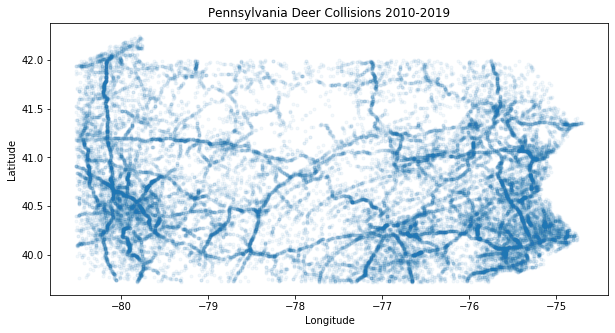

In [153]:
plt.figure(figsize=(10,5))
_temp = df_collisions
plt.scatter(_temp.DEC_LONG, _temp.DEC_LAT, marker='.', alpha=.05)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Pennsylvania Deer Collisions 2010-2019')
None

In [155]:
df_collisions.shape

(45176, 7)

In [156]:
df_collisions.to_csv('pa_raw_collisions_191001.csv')